In [1]:
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from os.path import join as oj
import sys
sys.path.append('..')
import numpy as np
from copy import deepcopy
import pickle as pkl
from torch.optim.lr_scheduler import StepLR
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise
from vision_analyze import viz_weights
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
def plot_all_weights():
    for fname in tqdm(os.listdir('sparse_bases')):
        if '.npy' in fname and '60000' in fname:
            print(fname)
            bases = np.load(oj('sparse_bases', fname))
            viz_weights.plot_weights(bases)
            plt.savefig(oj('sparse_bases', fname[:-4] + '.png'), dpi=600, bbox_inches = 'tight', pad_inches = 0)
# plot_all_weights()

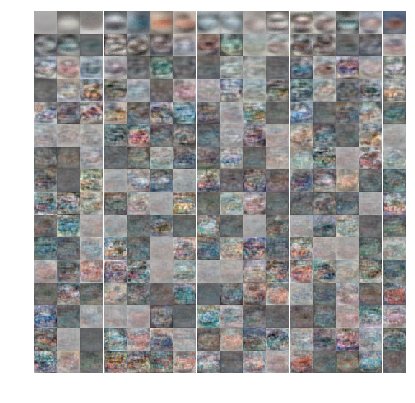

In [10]:
# fname = 'bases_iters=4400_alpha=0.1_ncomps=256.npy'
fname = 'bases_iters=300_alpha=1.0_ncomps=256.npy'

bases = np.load(oj('sparse_cifar', fname))
viz_weights.plot_weights(bases, dset='rgb')